In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive
from var import fname2mname, network2pair, network_sort_key

In [2]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "jsmaxcorr",
    "jsmincorr",
    "pearsonmaxcorr",
    "pearsonmincorr",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/attn_results6_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_heads_d = {}
for network in network_l:
    num_heads_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# DataFrames

In [4]:
maxcorr_df = pd.DataFrame(res_d["maxcorr"]["similarities"])
maxcorr_df = maxcorr_df.reindex(maxcorr_df.columns)

In [5]:
mincorr_df = pd.DataFrame(res_d["mincorr"]["similarities"])
mincorr_df = mincorr_df.reindex(mincorr_df.columns)

In [6]:
jsmaxcorr_df = pd.DataFrame(res_d["jsmaxcorr"]["similarities"])
jsmaxcorr_df = jsmaxcorr_df.reindex(jsmaxcorr_df.columns)

In [7]:
jsmaxcorr_df["gpt2_small-ptb_pos_dev_attn.hdf5_0"]

bert_base_cased-ptb_pos_dev_attn.hdf5_0       0.850796
bert_base_cased-ptb_pos_dev_attn.hdf5_1       0.867538
bert_base_cased-ptb_pos_dev_attn.hdf5_2       0.872739
bert_base_cased-ptb_pos_dev_attn.hdf5_3       0.894247
bert_base_cased-ptb_pos_dev_attn.hdf5_4       0.854904
                                                ...   
xlnet_large_cased-ptb_pos_dev_attn.hdf5_19    0.744149
xlnet_large_cased-ptb_pos_dev_attn.hdf5_20    0.769699
xlnet_large_cased-ptb_pos_dev_attn.hdf5_21    0.771552
xlnet_large_cased-ptb_pos_dev_attn.hdf5_22    0.738311
xlnet_large_cased-ptb_pos_dev_attn.hdf5_23    0.880617
Name: gpt2_small-ptb_pos_dev_attn.hdf5_0, Length: 108, dtype: float64

In [8]:
jsmincorr_df = pd.DataFrame(res_d["jsmincorr"]["similarities"])
jsmincorr_df = jsmincorr_df.reindex(jsmincorr_df.columns)

In [9]:
pearsonmaxcorr_df = pd.DataFrame(res_d["pearsonmaxcorr"]["similarities"])
pearsonmaxcorr_df = pearsonmaxcorr_df.reindex(pearsonmaxcorr_df.columns)

In [10]:
pearsonmincorr_df = pd.DataFrame(res_d["pearsonmincorr"]["similarities"])
pearsonmincorr_df = pearsonmincorr_df.reindex(pearsonmincorr_df.columns)

# Heatmaps

### MaxCorr, MinCorr

In [11]:
plt.rcParams["figure.figsize"] = (20,15)

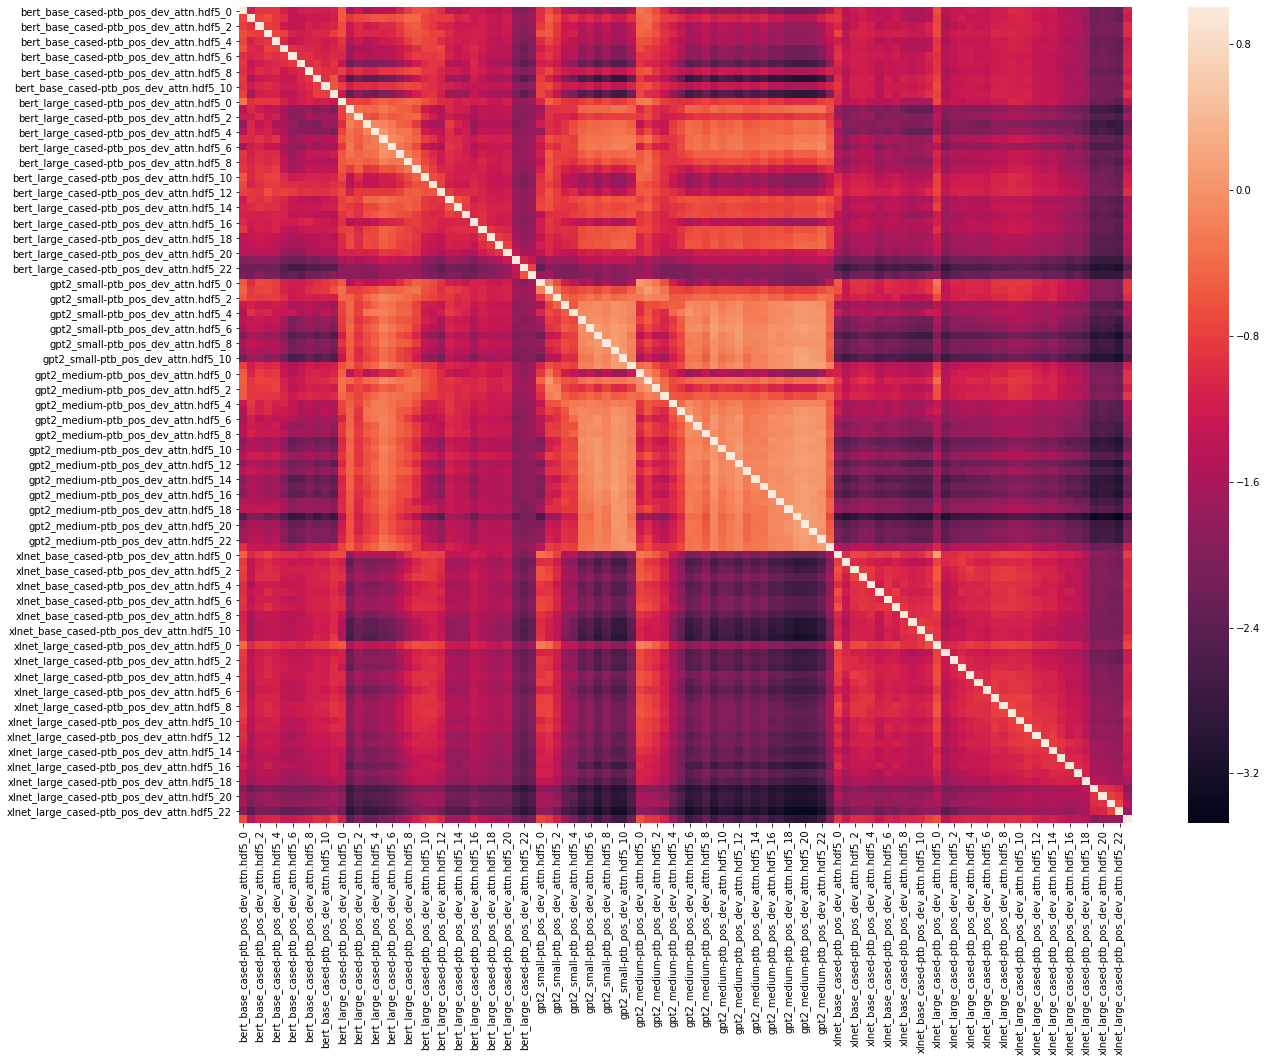

In [12]:
sns.heatmap(maxcorr_df.fillna(1))

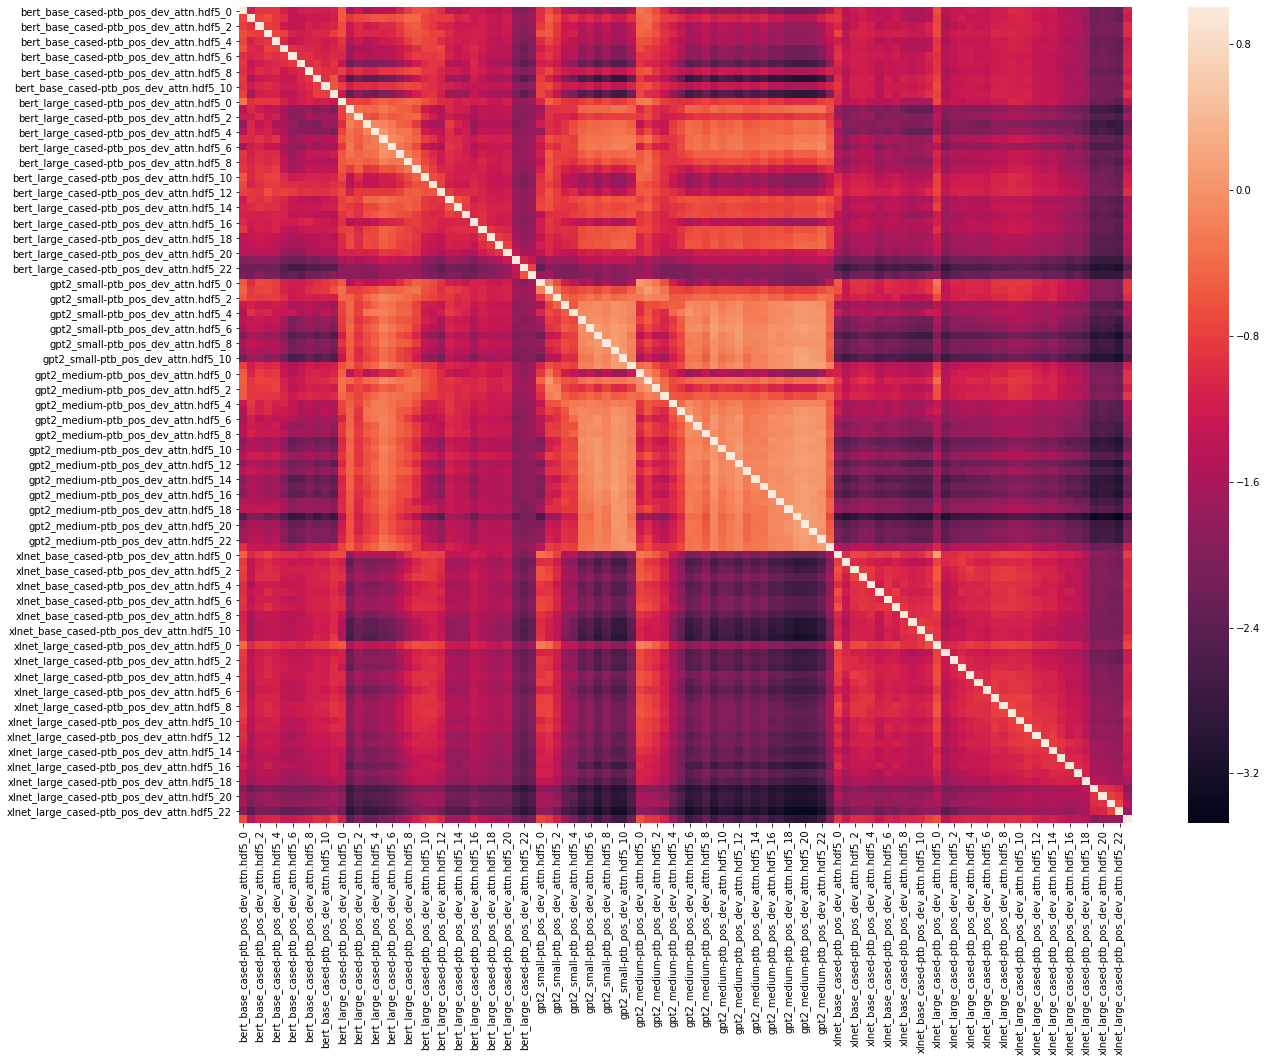

In [13]:
sns.heatmap(mincorr_df.fillna(1))

### JSMaxCorr, JSMinCorr

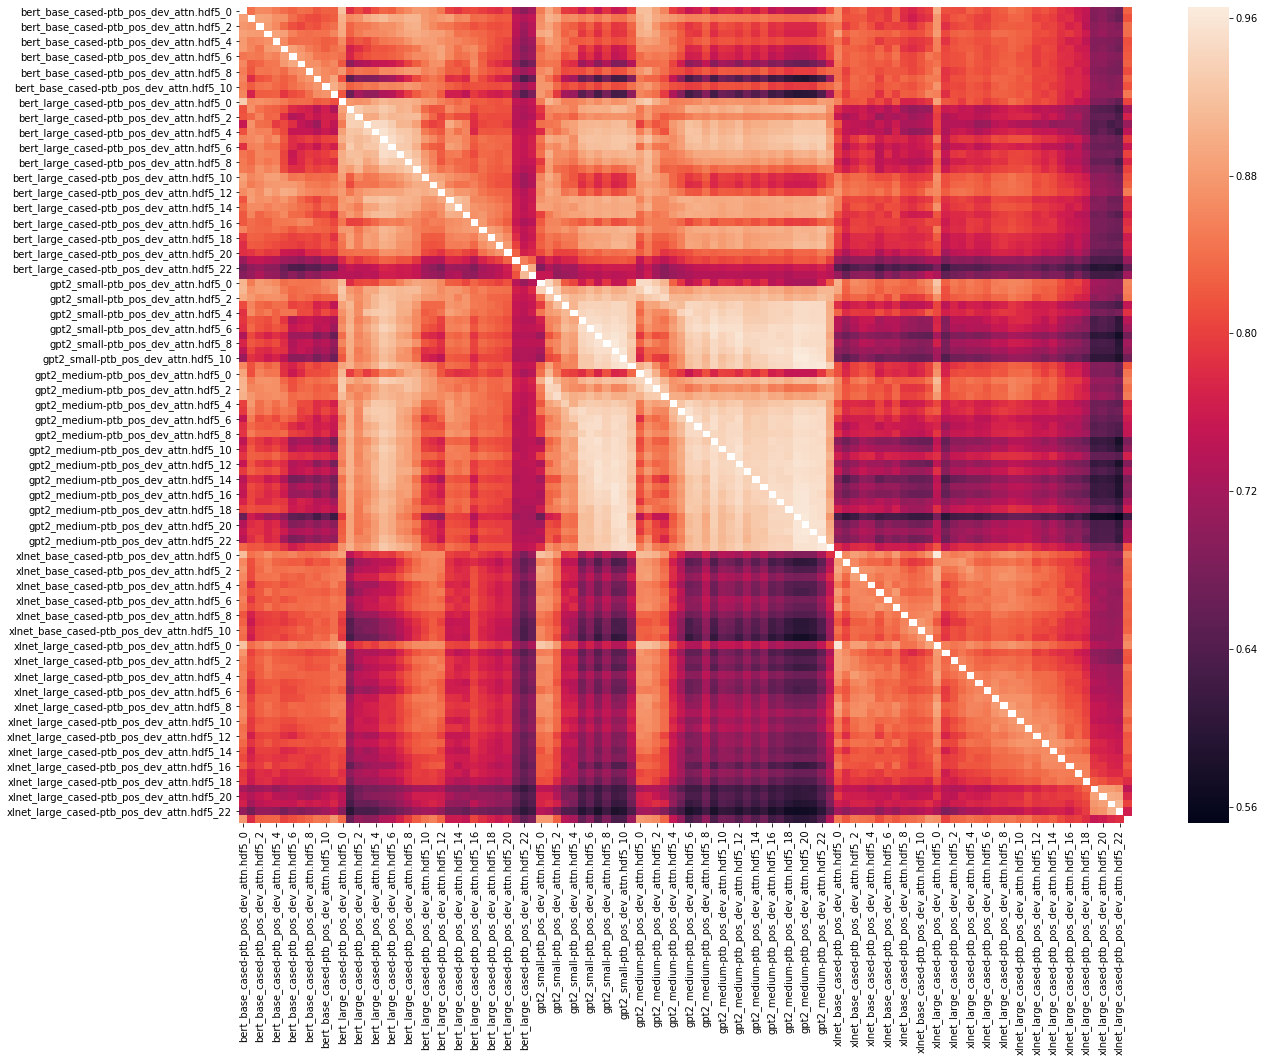

In [14]:
sns.heatmap(jsmaxcorr_df)

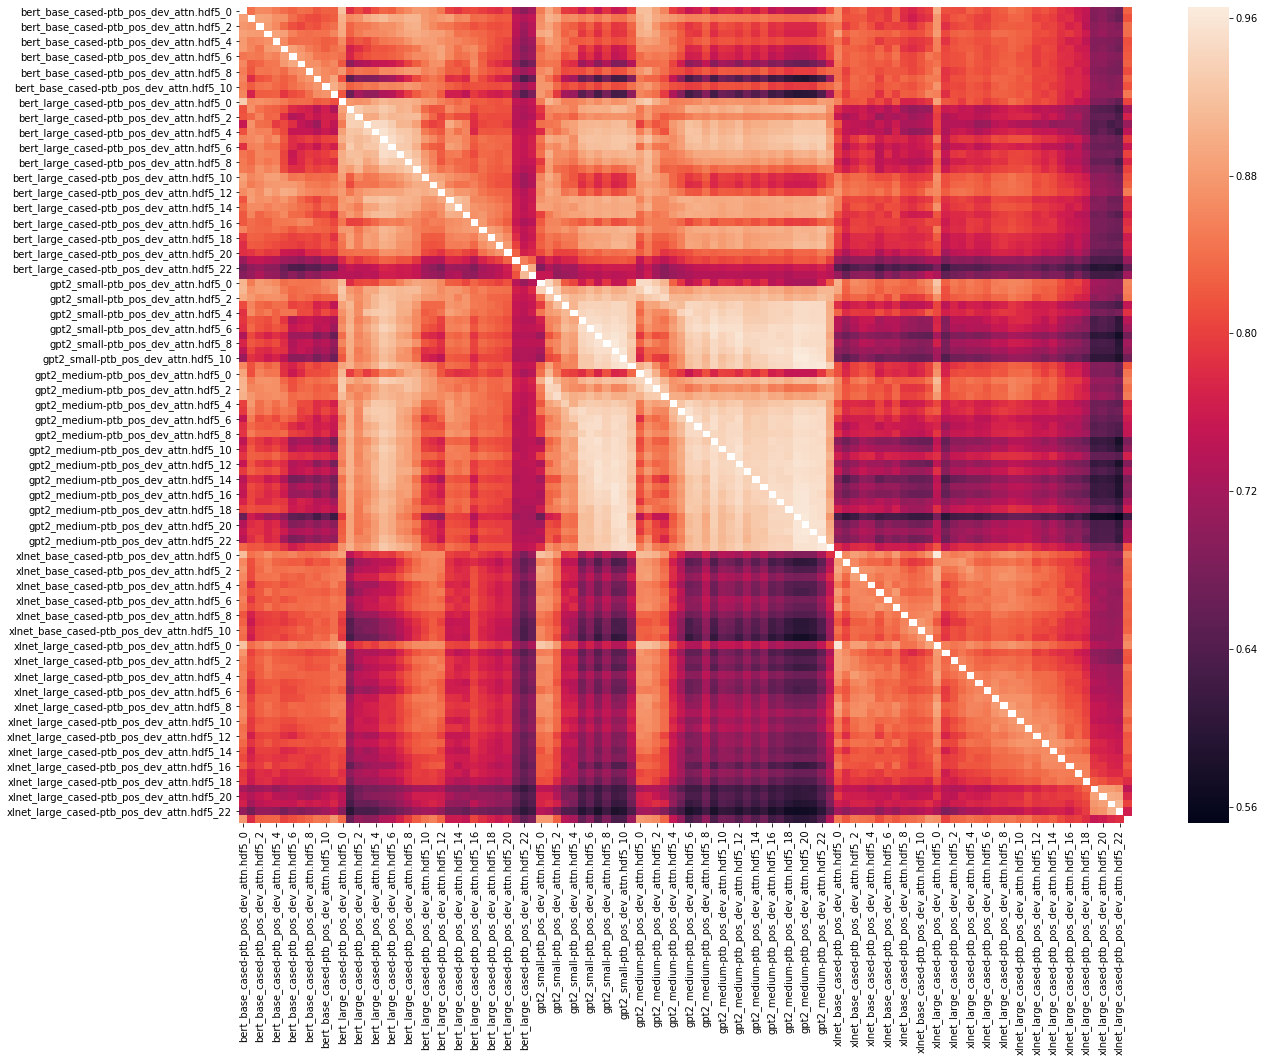

In [15]:
sns.heatmap(jsmincorr_df)

### PearsonMaxCorr, PearsonMinCorr

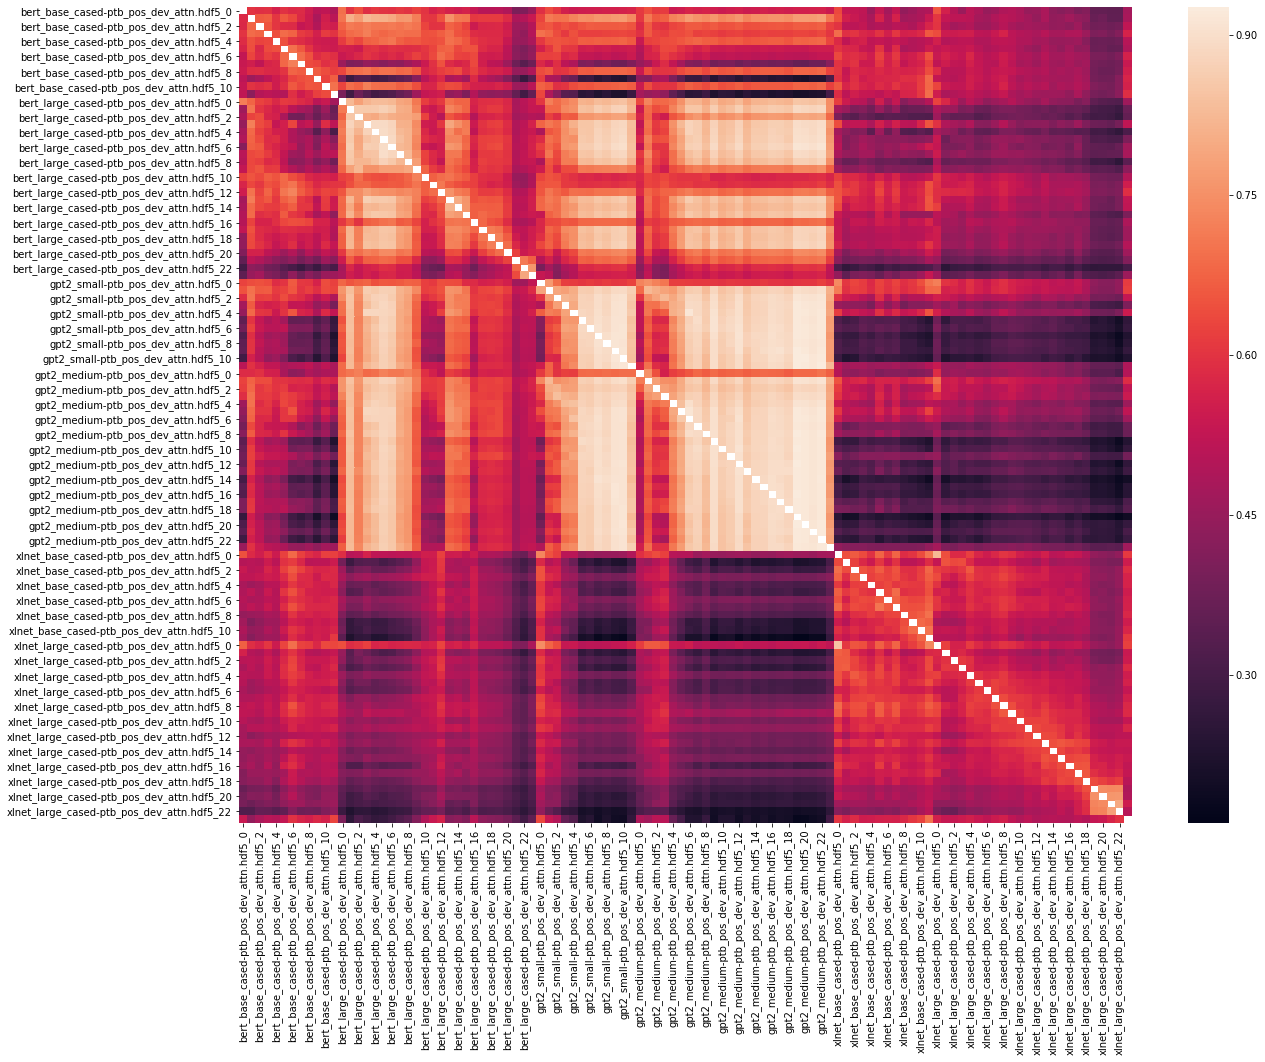

In [16]:
sns.heatmap(pearsonmaxcorr_df)

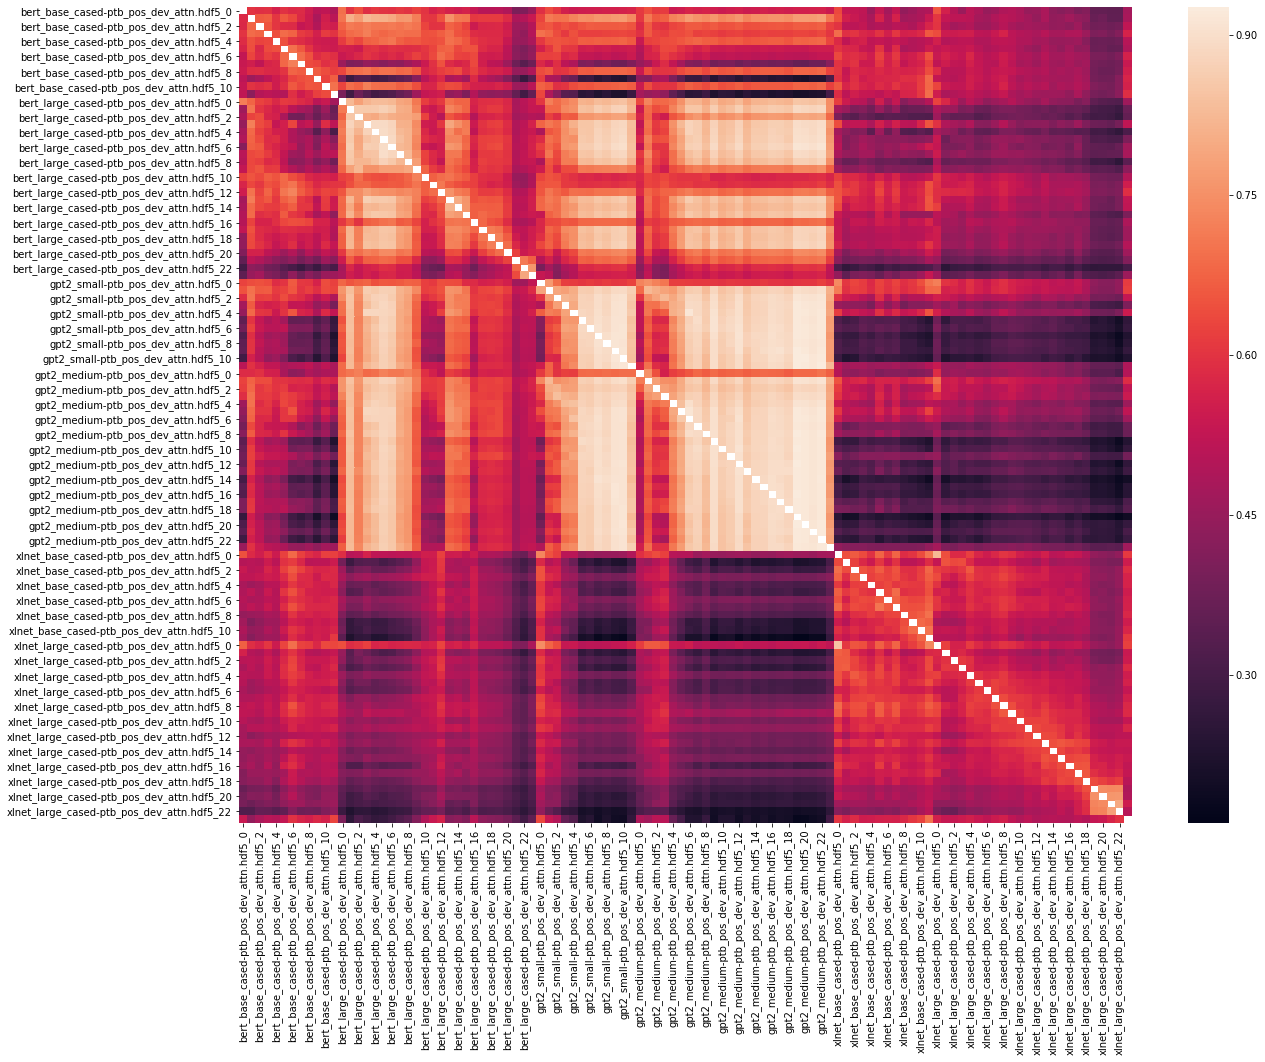

In [17]:
sns.heatmap(pearsonmincorr_df)